# Chapter 5: Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [1]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
np.random.seed(42)

### Plotting functions

In [2]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])
    
def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, **kwargs)
    
def plot_boundary(features, labels, coefficients, intercept):
    # Define the range for the features
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

    # Generate x values for the line
    xx = np.linspace(x_min, x_max, 100)

    # Calculate corresponding y values using the equation of the line:
    # w0*x0 + w1*x1 + intercept = 0
    # x1 = (-w0*x0 - intercept) / w1
    yy = (-coefficients[0] * xx - intercept) / coefficients[1]

    # Plot the decision boundary (line)
    plt.plot(xx, yy, color='green', linestyle='-', label='Decision Boundary')

    # Re-plot the original points
    # Separate points based on their labels
    features_label0 = features[labels == 0]
    features_label1 = features[labels == 1]

    # Plot points with label 0 as red squares
    plt.scatter(features_label0[:, 0], features_label0[:, 1], c='red', marker='s', label='Label 0')

    # Plot points with label 1 as blue triangles
    plt.scatter(features_label1[:, 0], features_label1[:, 1], c='blue', marker='^', label='Label 1')

    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary and Data Points')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

### Defining and plotting our dataset

In [3]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

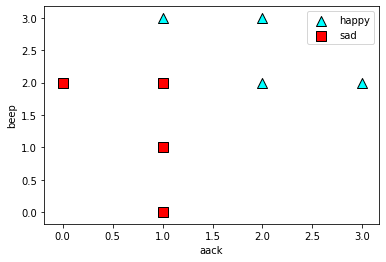

In [6]:
# Plotting the points
plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#draw_line(1,1,-3.5)

### Coding the perceptron trick

In [7]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [8]:
#weights = [1,1]
#bias = -3.5
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(prediction(weights, bias, features[i]), error(weights, bias, features[i], labels[i]))

0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0


In [9]:
# First perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.05):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    return weights, bias

In [10]:
# Shorter version of the perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.05):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [11]:
perceptron_trick(weights, bias, features[6], 0)

([0.9, 1.85], -4.1)

### Running the perceptron algorithm

In [12]:
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    draw_line(weights[0], weights[1], bias)
    plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

/Users/luisserrano/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


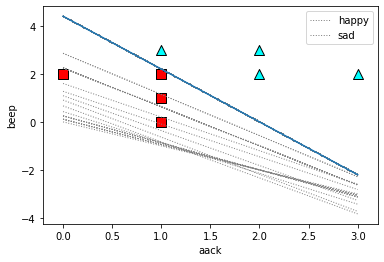

([0.5499999999999996, 0.25], -1.1000000000000003)

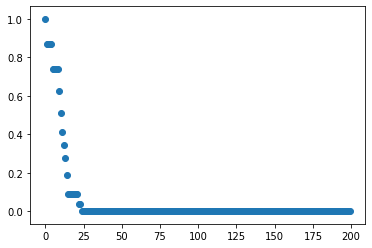

In [13]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using scikit-learn

In [14]:
from sklearn.linear_model import Perceptron

# Create a Perceptron model
perceptron = Perceptron()

# Fit the model to the data
perceptron.fit(features, labels)

# Predict the labels for the features
predictions = perceptron.predict(features)

print("Predictions:", predictions)

Predictions: [0 0 0 0 1 1 1 1]


In [15]:
# The coefficients of the model
coefficients = perceptron.coef_[0]
intercept = perceptron.intercept_[0]

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [4. 2.]
Intercept: -9.0


This gives us the line with equation 4x_0 + 2x_1 - 9 = 0. Notice that the coefficients are not the same as the ones found above, but the line is very similar.

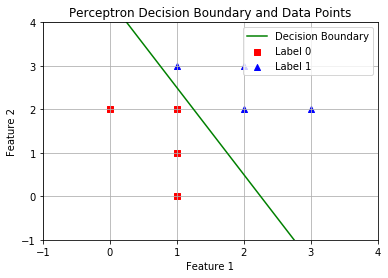

In [16]:
plot_boundary(features, labels, coefficients, intercept)